Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords #Natural Language toolkit
from nltk.stem.porter import PorterStemmer #Reduce words to its root form
from sklearn.feature_extraction.text import TfidfVectorizer #Transform textual data to Numerical data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # ML model
from sklearn.metrics import accuracy_score
print('Action Complete')

Action Complete


In [37]:
#Importing datasets 
#1. Training dataset
twitter_training = pd.read_csv(r'C:\Users\hp\OneDrive\Prodigy Infotech Internship\TASK04\twitter_training.csv')

# Display the first few rows
print(twitter_training.head())

   Tweet ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


DATA EXPLORATION

In [38]:
# Check column names and data types
print(twitter_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [39]:
# Display a random sample of rows to better understand the data
print(twitter_training.sample(5))

       Tweet ID           Entity Sentiment  \
66623      7008  johnson&johnson   Neutral   
21854      4140            CS-GO   Neutral   
11990      8462            NBA2K  Positive   
31997      7491  LeagueOfLegends   Neutral   
390        2466      Borderlands  Positive   

                                           Tweet Content  
66623  Pain Replacement Therapy Market Is Projected T...  
21854  Can globality be restored after this game?. @ ...  
11990  Ummmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm...  
31997  and fuck I just realized.. Since a League of L...  
390    I am here... With Samsung that is full of home...  


In [40]:
# Check for sum of missing values in each column
print(twitter_training.isnull().sum())

Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64


In [41]:
twitter_training.describe()

,Tweet ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


DATA CLEANING 

In [46]:
#1. Handling missiing values
twitter_training['Tweet Content'] = twitter_training['Tweet Content'].fillna("")

print(twitter_training.isnull().sum())

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64


In [48]:
#2. lowercase each word for simplicity
twitter_training['lowercase'] = twitter_training['Tweet Content'].apply(
    lambda x: ' '.join(word.lower() for word in x.split())
)

print(twitter_training[['Tweet Content', 'lowercase']].head(10))

                                       Tweet Content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   
5  im getting into borderlands and i can murder y...   
6  So I spent a few hours making something for fu...   
7  So I spent a couple of hours doing something f...   
8  So I spent a few hours doing something for fun...   
9  So I spent a few hours making something for fu...   

                                           lowercase  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
5  im getting into borderlands and i can murder y... 

In [ ]:
# Remove all punctuations
twitter_training['Punctuations'] = twitter_training['lowercase'].str.replace(r'[^\w\s]', '', regex=True)

print(twitter_training[['lowercase', 'Punctuations']].head(10))


                                           lowercase  \
0  im getting on borderlands and i will murder yo...   
1  i am coming to the borders and i will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   
5  im getting into borderlands and i can murder y...   
6  so i spent a few hours making something for fu...   
7  so i spent a couple of hours doing something f...   
8  so i spent a few hours doing something for fun...   
9  so i spent a few hours making something for fu...   

                                        Punctuations  
0  im getting on borderlands and i will murder yo...  
1  i am coming to the borders and i will kill you...  
2  im getting on borderlands and i will kill you all  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
5  im getting into borderlands and i can murder y... 

In [50]:
#4. Drop duplicates based on 'cleaned_content' column
twitter_training.drop_duplicates(subset=['Punctuations'], inplace=True)

# Reset the index after dropping duplicates
twitter_training.reset_index(drop=True, inplace=True)

# Verify the result
print(f"Number of rows after dropping duplicates: {len(twitter_training)}")

Number of rows after dropping duplicates: 68118


In [51]:
# Check for missing values in all columns
print(twitter_training.isnull().sum())

Tweet ID         0
Entity           0
Sentiment        0
Tweet Content    0
lowercase        0
Punctuations     0
dtype: int64


In [56]:
#5. Removing stopwords

#Download stopwords from nltk library
import nltk
nltk.download('stopwords')

stop_words= stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [61]:
# Function to remove stopwords from the text
def remove_stopwords(text):
    # Split the text into words, remove stopwords, and join back
    return " ".join(word for word in text.split() if word not in stop_words)

# Apply stopword removal to the 'Punctuations' column 
twitter_training['no_stopwords'] = twitter_training['Punctuations'].apply(remove_stopwords)

# Inspect the results
print(twitter_training[['Punctuations', 'no_stopwords']].head())


                                        Punctuations  \
0  im getting on borderlands and i will murder yo...   
1  i am coming to the borders and i will kill you...   
2  im getting on borderlands and i will kill you all   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                      no_stopwords  
0    im getting borderlands murder  
1              coming borders kill  
2      im getting borderlands kill  
3     im coming borderlands murder  
4  im getting borderlands 2 murder  


TOKENIZATION

In [63]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Apply tokenization to the 'no_stopwords' column (or whichever column you're working with)
twitter_training['tokens'] = twitter_training['no_stopwords'].apply(word_tokenize)

# Inspect the result
print(twitter_training[['no_stopwords', 'tokens']].head())

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


                      no_stopwords                                 tokens
0    im getting borderlands murder     [im, getting, borderlands, murder]
1              coming borders kill                [coming, borders, kill]
2      im getting borderlands kill       [im, getting, borderlands, kill]
3     im coming borderlands murder      [im, coming, borderlands, murder]
4  im getting borderlands 2 murder  [im, getting, borderlands, 2, murder]


STEMMING AND LEMATIZATION

In [64]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization to each token
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization to the tokens
twitter_training['lemmatized'] = twitter_training['tokens'].apply(lemmatize_tokens)

# Inspect the result
print(twitter_training[['tokens', 'lemmatized']].head())

                                  tokens                            lemmatized
0     [im, getting, borderlands, murder]     [im, getting, borderland, murder]
1                [coming, borders, kill]                [coming, border, kill]
2       [im, getting, borderlands, kill]       [im, getting, borderland, kill]
3      [im, coming, borderlands, murder]      [im, coming, borderland, murder]
4  [im, getting, borderlands, 2, murder]  [im, getting, borderland, 2, murder]


In [66]:
# Display the first few rows of the dataset
print(twitter_training.head())


   Tweet ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                           lowercase  \
0  im getting on borderlands and i will murder yo...   
1  i am coming to the borders and i will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                        Punctuations  \
0  im getting on borderlands and i will m

In [67]:
# Display the column names of the dataset
print(twitter_training.columns)

Index(['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content', 'lowercase',
       'Punctuations', 'no_stopwords', 'tokens', 'lemmatized',
       'sentiment_score', 'predicted_sentiment'],
      dtype='object')


In [68]:
# Drop unnecessary columns 
columns_to_drop = ['lowercase', 'Punctuations', 'no_stopwords', 'tokens','sentiment_score', 'predicted_sentiment' ]  # Add more columns if needed
twitter_training.drop(columns=columns_to_drop, inplace=True)

# Display the dataset after dropping columns
print(twitter_training.head())

   Tweet ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                             lemmatized  
0     [im, getting, borderland, murder]  
1                [coming, border, kill]  
2       [im, getting, borderland, kill]  
3      [im, coming, borderland, murder]  
4  [im, getting, borderland, 2, murder]  


VISUALIZATION

1. Visualizing Sentiment Distribution

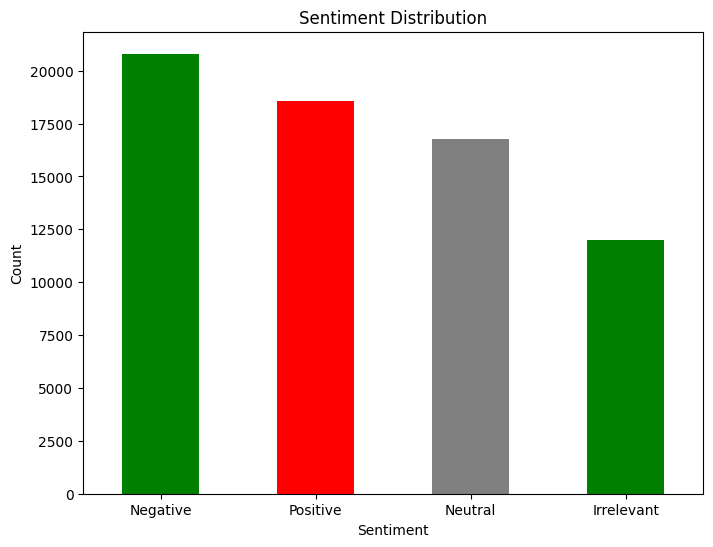

In [69]:
import matplotlib.pyplot as plt

# Count the sentiment distribution
sentiment_counts = twitter_training['Sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


2. Visualizing Sentiment by Topic

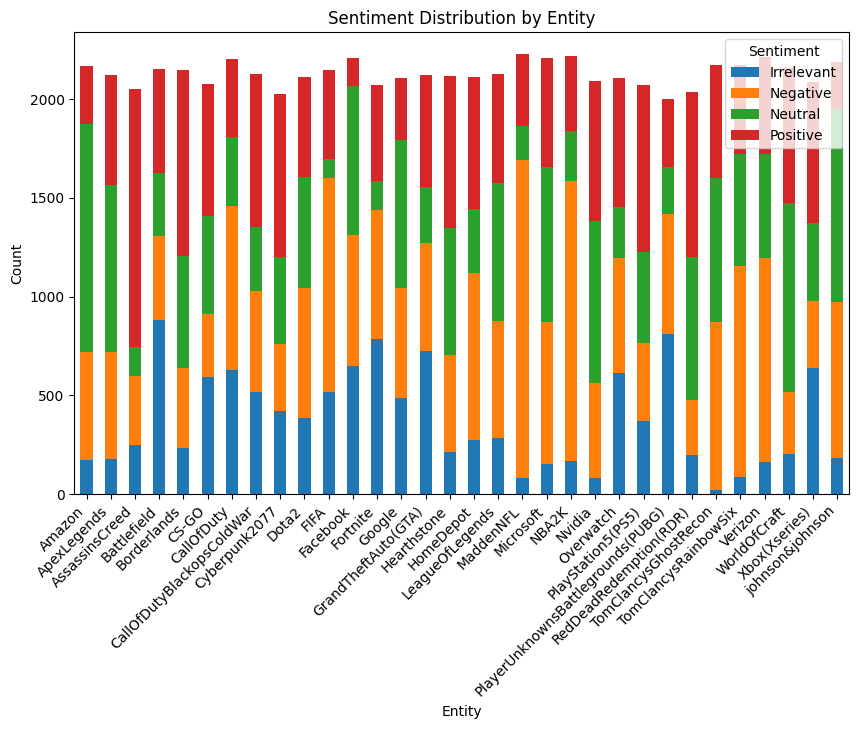

In [70]:
# Group by 'Entity' and 'Sentiment' and count occurrences
entity_sentiment = twitter_training.groupby(['Entity', 'Sentiment']).size().unstack()

# Plot the sentiment by entity
entity_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()


3. Visualization of top 5 negative and top 5 positive

In [78]:
# Group by 'Sentiment' and 'Entity' to count the number of tweets
sentiment_entity_count = twitter_training.groupby(['Entity', 'Sentiment']).size().unstack()

# Filter for Positive and Negative sentiments only
positive_sentiment = sentiment_entity_count['Positive'].sort_values(ascending=False).head(5)
negative_sentiment = sentiment_entity_count['Negative'].sort_values(ascending=False).head(5)

# Display the top 5 topics for positive and negative sentiments
print("Top 5 Topics with Positive Sentiments:")
print(positive_sentiment)
print("\nTop 5 Topics with Negative Sentiments:")
print(negative_sentiment)


Top 5 Topics with Positive Sentiments:
Entity
AssassinsCreed            1304
Borderlands                938
PlayStation5(PS5)          848
RedDeadRedemption(RDR)     839
Cyberpunk2077              822
Name: Positive, dtype: int64

Top 5 Topics with Negative Sentiments:
Entity
MaddenNFL               1606
NBA2K                   1415
FIFA                    1083
TomClancysRainbowSix    1064
Verizon                 1029
Name: Negative, dtype: int64


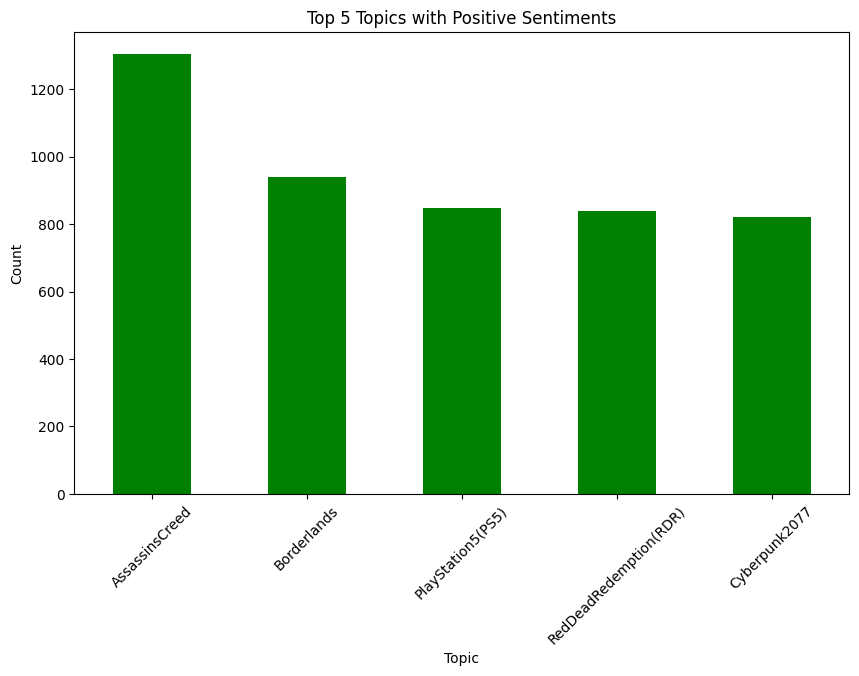

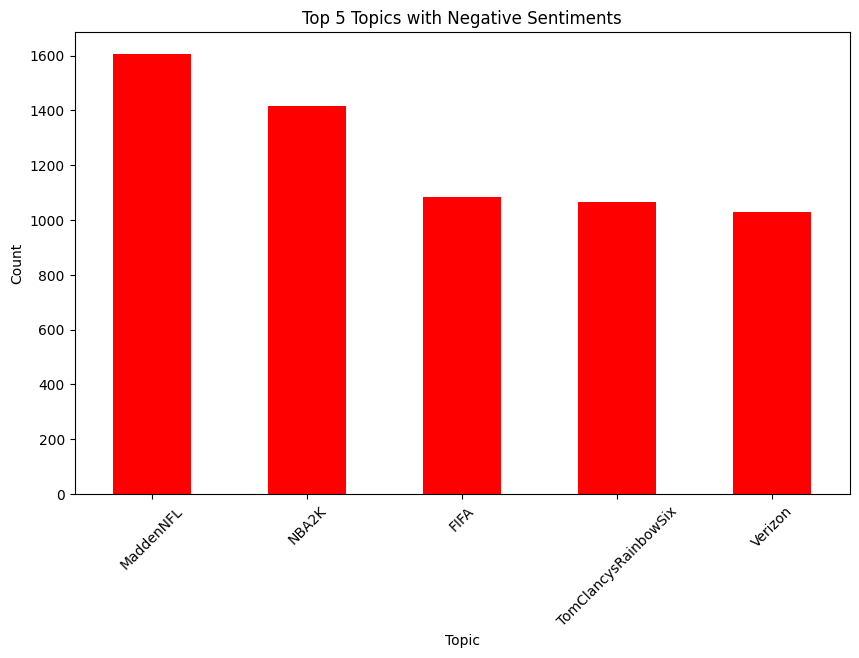

In [77]:
# Plot the Top 5 Topics with Positive Sentiments
plt.figure(figsize=(10, 6))
positive_sentiment.plot(kind='bar', color='green')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the Top 5 Topics with Negative Sentiments
plt.figure(figsize=(10, 6))
negative_sentiment.plot(kind='bar', color='red')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


4. Correlation between top 5 positive and negative sentiments

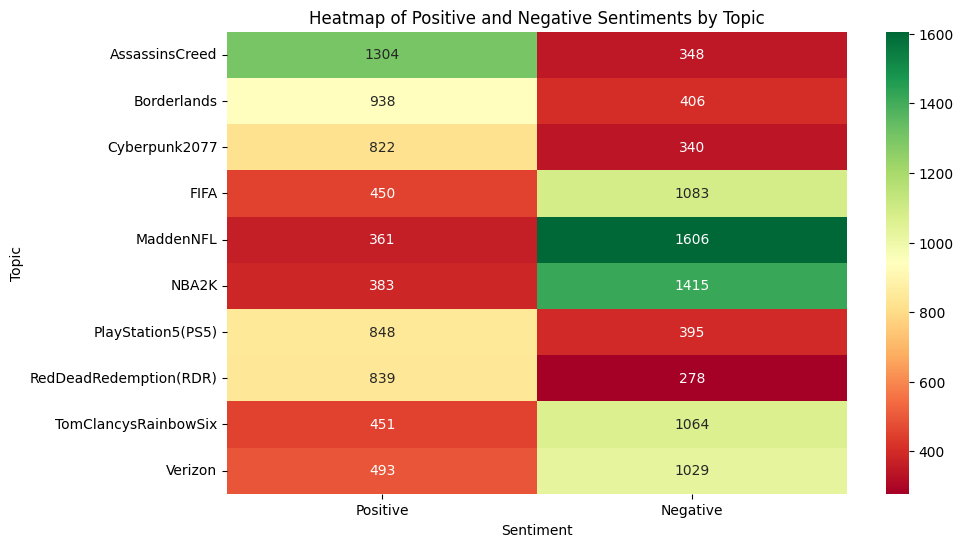

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Sentiment' and 'Entity' to count the number of tweets
sentiment_entity_count = twitter_training.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

# Sort and select the top 5 topics with Positive and Negative sentiments
top_positive = sentiment_entity_count['Positive'].sort_values(ascending=False).head(5)
top_negative = sentiment_entity_count['Negative'].sort_values(ascending=False).head(5)

# Combine the results into a single dataframe for heatmap visualization
top_sentiments = sentiment_entity_count.loc[top_positive.index.union(top_negative.index), ['Positive', 'Negative']]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_sentiments, annot=True, cmap='RdYlGn', fmt='d', cbar=True)
plt.title('Heatmap of Positive and Negative Sentiments by Topic')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()
